# Agriculture Project


Problem Statement:
Machine Learning in Agriculture

Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.


Use the links below to download the dataset. 

Training Data :
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/train_agriculture.xlsx

Testing Data :
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/test_agriculture.xlsx

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel(r'Z:\ML Datasets\Agri_train.xlsx')
test  = pd.read_excel(r'Z:\ML Datasets\Agri_test.xlsx')

In [3]:
train 

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [4]:
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [5]:
df = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, df.shape)

(4599, 10) (1199, 9) (5798, 10)


In [6]:
df = df.drop(['ID'], axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  5798 non-null   int64  
 1   Crop_Type                5798 non-null   int64  
 2   Soil_Type                5798 non-null   int64  
 3   Pesticide_Use_Category   5798 non-null   int64  
 4   Number_Doses_Week        5798 non-null   int64  
 5   Number_Weeks_Used        5237 non-null   float64
 6   Number_Weeks_Quit        5798 non-null   int64  
 7   Season                   5798 non-null   int64  
 8   Crop_Damage              4599 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 407.8 KB


In [8]:
df.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

Estimated_Insects_Count     0.000000
Crop_Type                   0.000000
Soil_Type                   0.000000
Pesticide_Use_Category      0.000000
Number_Doses_Week           0.000000
Number_Weeks_Used           9.675750
Number_Weeks_Quit           0.000000
Season                      0.000000
Crop_Damage                20.679545
dtype: float64

In [10]:
cols = df.columns
df[cols] = df[cols].fillna(df.mode().iloc[0])

In [11]:
df.nunique()

Estimated_Insects_Count    71
Crop_Type                   2
Soil_Type                   2
Pesticide_Use_Category      3
Number_Doses_Week          20
Number_Weeks_Used          63
Number_Weeks_Quit          47
Season                      3
Crop_Damage                 3
dtype: int64

# EDA

<AxesSubplot:xlabel='Estimated_Insects_Count', ylabel='Crop_Damage'>

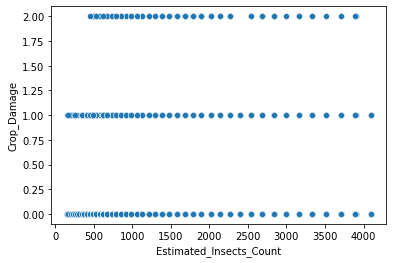

In [12]:
sns.scatterplot(data = df, x = 'Estimated_Insects_Count', y = 'Crop_Damage')

<AxesSubplot:xlabel='Crop_Type', ylabel='Crop_Damage'>

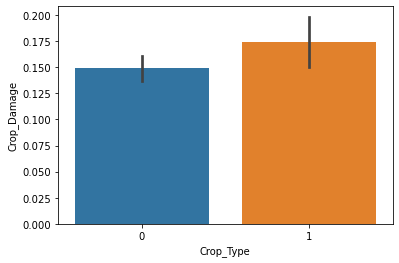

In [13]:
sns.barplot(data = df, x = 'Crop_Type', y = 'Crop_Damage')

<AxesSubplot:xlabel='Soil_Type', ylabel='Crop_Damage'>

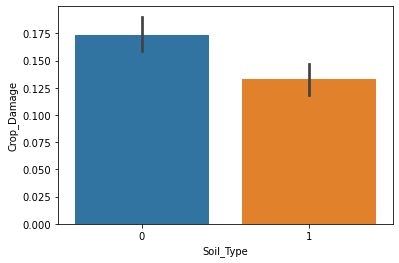

In [14]:
sns.barplot(data = df, x = 'Soil_Type', y = 'Crop_Damage')

<AxesSubplot:xlabel='Pesticide_Use_Category', ylabel='Crop_Damage'>

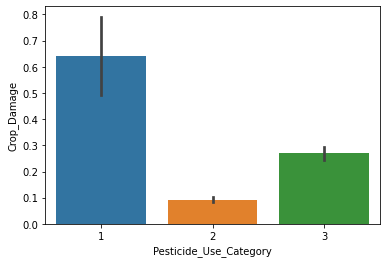

In [15]:
sns.barplot(data = df, x = 'Pesticide_Use_Category', y = 'Crop_Damage')

<AxesSubplot:xlabel='Number_Doses_Week', ylabel='Crop_Damage'>

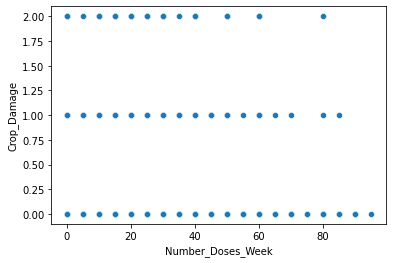

In [16]:
sns.scatterplot(data = df, x = 'Number_Doses_Week', y = 'Crop_Damage')

<AxesSubplot:xlabel='Number_Weeks_Used', ylabel='Crop_Damage'>

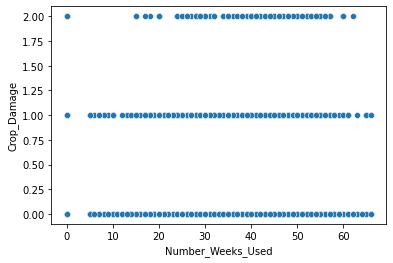

In [17]:
sns.scatterplot(data = df, x = 'Number_Weeks_Used', y = 'Crop_Damage')

<AxesSubplot:xlabel='Number_Weeks_Quit', ylabel='Crop_Damage'>

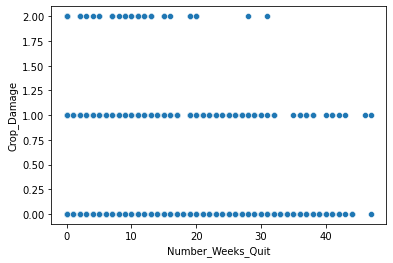

In [18]:
sns.scatterplot(data = df, x = 'Number_Weeks_Quit', y = 'Crop_Damage')

<AxesSubplot:xlabel='Season', ylabel='Crop_Damage'>

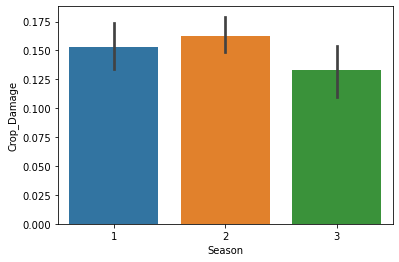

In [19]:
sns.barplot(data = df, x = 'Season', y = 'Crop_Damage')

# Correlation

In [20]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.024004,-0.190848,-0.015056,-0.122206,0.431917,0.228822,-0.002287,0.182373
Crop_Type,-0.024004,1.000000,-0.127340,0.373412,-0.164966,0.010887,-0.290973,0.003754,0.024936
Soil_Type,-0.190848,-0.127340,1.000000,0.044193,0.051543,-0.099297,-0.062686,-0.005204,-0.048734
Pesticide_Use_Category,-0.015056,0.373412,0.044193,1.000000,-0.006929,0.365346,-0.574041,0.009279,0.153633
Number_Doses_Week,-0.122206,-0.164966,0.051543,-0.006929,1.000000,0.102647,-0.024209,0.002751,-0.016304
Number_Weeks_Used,0.431917,0.010887,-0.099297,0.365346,0.102647,1.000000,-0.412724,-0.007032,0.193189
Number_Weeks_Quit,0.228822,-0.290973,-0.062686,-0.574041,-0.024209,-0.412724,1.000000,0.010324,-0.118133
Season,-0.002287,0.003754,-0.005204,0.009279,0.002751,-0.007032,0.010324,1.000000,-0.012775
Crop_Damage,0.182373,0.024936,-0.048734,0.153633,-0.016304,0.193189,-0.118133,-0.012775,1.000000


<AxesSubplot:>

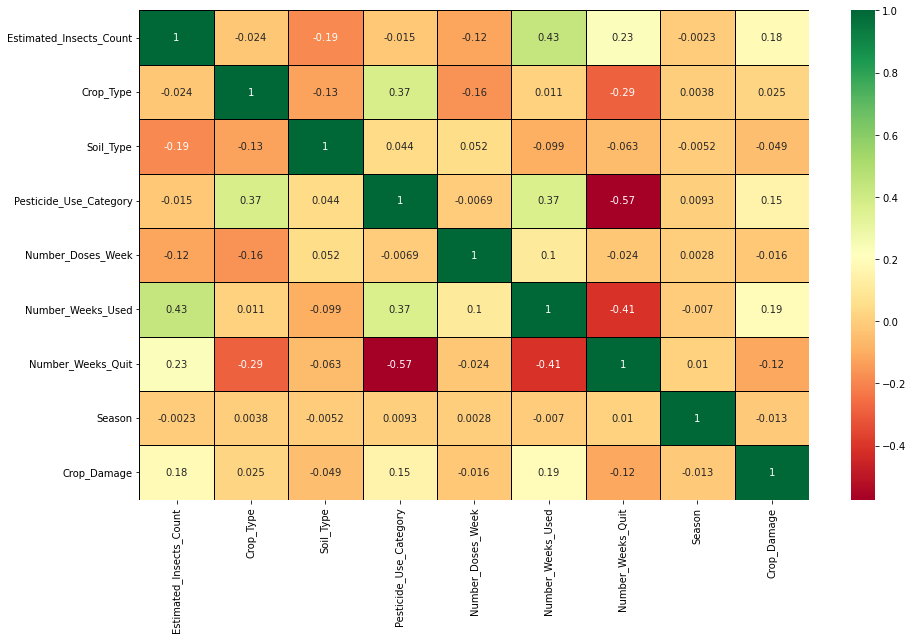

In [21]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, linecolor = 'black', cmap = 'RdYlGn')

In [22]:
df.corr().sum()

Estimated_Insects_Count    1.488712
Crop_Type                  0.805705
Soil_Type                  0.561627
Pesticide_Use_Category     1.349837
Number_Doses_Week          0.822326
Number_Weeks_Used          1.584935
Number_Weeks_Quit         -0.243619
Season                     0.998810
Crop_Damage                1.358185
dtype: float64

Estimated_Insects_Count       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Crop_Type                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Soil_Type                   AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Pesticide_Use_Category     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Number_Doses_Week          AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Number_Weeks_Used                AxesSubplot(0.125,0.125;0.133621x0.343182)
Number_Weeks_Quit             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Season                         AxesSubplot(0.44569,0.125;0.133621x0.343182)
Crop_Damage                   AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

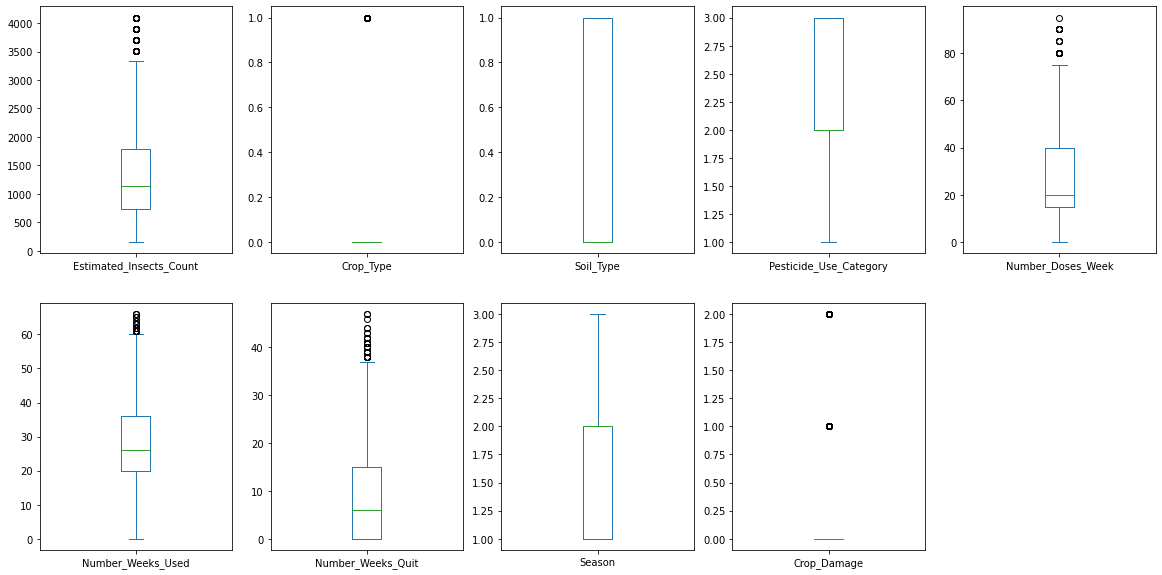

In [23]:
df.plot(kind = 'box', subplots = True, layout = (2,5), figsize = (20,10))

In [24]:
df.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                float64
dtype: object

In [25]:
from scipy.stats import zscore
z = np.abs(zscore(df))
df.shape

(5798, 9)

In [26]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(5528, 9)

In [27]:
loss = ((5798-5528)/5798)*100
loss

4.656778199379096

# Skewness

In [28]:
df1.skew()

Estimated_Insects_Count    0.832175
Crop_Type                  1.349880
Soil_Type                  0.095649
Pesticide_Use_Category     0.589436
Number_Doses_Week          0.696343
Number_Weeks_Used          0.429314
Number_Weeks_Quit          0.854188
Season                     0.145126
Crop_Damage                2.410720
dtype: float64

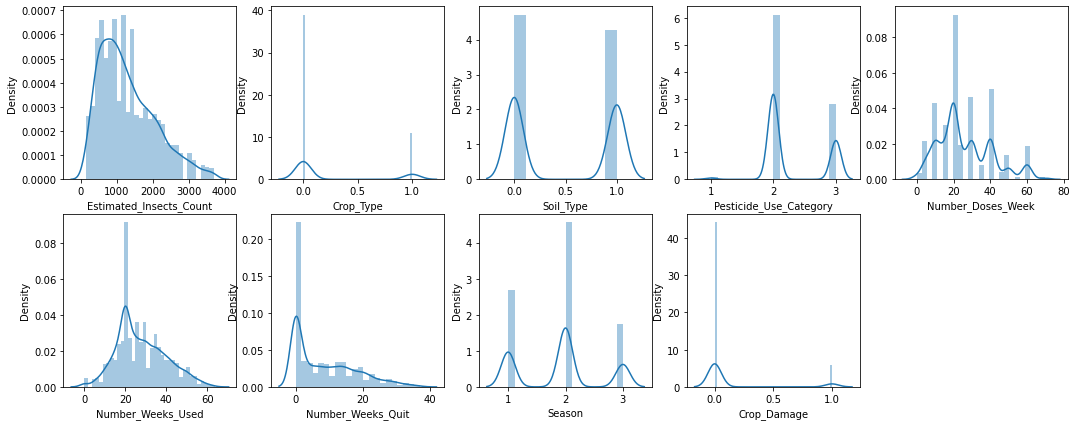

In [30]:
plt.figure(figsize=(18,7))
for i, column in enumerate(df1.columns, 1):
    plt.subplot(2,5,i)
    sns.distplot(df1[column])

In [31]:
df1.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,5528.000000,5528.000000,5528.000000,5528.000000,5528.000000,5528.000000,5528.000000,5528.000000,5528.000000
mean,1304.625000,0.220333,0.476122,2.299385,25.988603,27.816389,8.638929,1.893632,0.115232
std,770.613641,0.414509,0.499475,0.480395,14.706416,12.062279,9.230335,0.693929,0.319330
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,26.000000,6.000000,2.000000,0.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,36.000000,15.000000,2.000000,0.000000
max,3702.000000,1.000000,1.000000,3.000000,70.000000,64.000000,37.000000,3.000000,1.000000


In [32]:
X = df1.drop(['Crop_Damage'], axis = 1)
Y = df1['Crop_Damage']

In [33]:
from sklearn.preprocessing import power_transform
X = power_transform(X, method = 'yeo-johnson')
X

array([[-2.21116859,  1.88111346, -0.95333089, ..., -3.0606548 ,
        -1.20538355, -1.33656791],
       [-2.11249724,  1.88111346, -0.95333089, ..., -3.0606548 ,
        -1.20538355,  0.21341381],
       [-1.91039479,  1.88111346, -0.95333089, ..., -3.0606548 ,
        -1.20538355,  0.21341381],
       ...,
       [-0.02024623, -0.53160005,  1.04895374, ..., -1.27289282,
         1.264903  , -1.33656791],
       [ 0.08899797, -0.53160005,  1.04895374, ...,  0.63687834,
         0.09066317, -1.33656791],
       [ 0.08899797, -0.53160005,  1.04895374, ..., -0.59817121,
         1.14460465,  1.51211999]])

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-2.21116859,  1.88111346, -0.95333089, ..., -3.0606548 ,
        -1.20538355, -1.33656791],
       [-2.11249724,  1.88111346, -0.95333089, ..., -3.0606548 ,
        -1.20538355,  0.21341381],
       [-1.91039479,  1.88111346, -0.95333089, ..., -3.0606548 ,
        -1.20538355,  0.21341381],
       ...,
       [-0.02024623, -0.53160005,  1.04895374, ..., -1.27289282,
         1.264903  , -1.33656791],
       [ 0.08899797, -0.53160005,  1.04895374, ...,  0.63687834,
         0.09066317, -1.33656791],
       [ 0.08899797, -0.53160005,  1.04895374, ..., -0.59817121,
         1.14460465,  1.51211999]])

# Train test split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [37]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(lr, X_train, Y_train, cv=None)
cvs.mean()

[[988   1]
 [117   0]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       989
         1.0       0.00      0.00      0.00       117

    accuracy                           0.89      1106
   macro avg       0.45      0.50      0.47      1106
weighted avg       0.80      0.89      0.84      1106

0.8933092224231465


0.8819536263005855

In [38]:
#RandomForest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
pred = rf.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(rf, X_train, Y_train, cv=None)
cvs.mean()

[[967  22]
 [104  13]]
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       989
         1.0       0.37      0.11      0.17       117

    accuracy                           0.89      1106
   macro avg       0.64      0.54      0.55      1106
weighted avg       0.85      0.89      0.86      1106

0.8860759493670886


0.8726819541375873

In [39]:
#DescisonTree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
pred = dt.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(dt, X_train, Y_train, cv=None)
cvs.mean()

[[868 121]
 [ 82  35]]
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90       989
         1.0       0.22      0.30      0.26       117

    accuracy                           0.82      1106
   macro avg       0.57      0.59      0.58      1106
weighted avg       0.84      0.82      0.83      1106

0.8164556962025317


0.7973768438274919

In [40]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(svc, X_train, Y_train, cv=None)
cvs.mean()

[[984   5]
 [112   5]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       989
         1.0       0.50      0.04      0.08       117

    accuracy                           0.89      1106
   macro avg       0.70      0.52      0.51      1106
weighted avg       0.86      0.89      0.85      1106

0.8942133815551537


0.8833108367206073

In [41]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(knn, X_train, Y_train, cv=None)
cvs.mean()

[[960  29]
 [106  11]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       989
         1.0       0.28      0.09      0.14       117

    accuracy                           0.88      1106
   macro avg       0.59      0.53      0.54      1106
weighted avg       0.83      0.88      0.85      1106

0.8779385171790235


0.866348902011913

# Hyperparameter Tuning

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
n_neighbors=[2,5,6,9,11,3]
weights = ['uniform', 'distance']
algorithm= ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [10,20,30,45]
metric = ['minkowski','euclidean','manhattan']
n_jobs = [15,25,40,60]

random_grid = {'n_neighbors': n_neighbors,
               'weights' : weights,
               'algorithm' : algorithm,
               'leaf_size' : leaf_size,
               'metric' :  metric,
               'n_jobs' : n_jobs}
print(random_grid)

{'n_neighbors': [2, 5, 6, 9, 11, 3], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [10, 20, 30, 45], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'n_jobs': [15, 25, 40, 60]}


In [44]:
knn = KNeighborsClassifier()
rs = RandomizedSearchCV
rscv = RandomizedSearchCV(estimator = knn,
                          param_distributions= random_grid, 
                          n_iter =100,
                          cv = 3,
                          n_jobs=-1)

In [45]:
rscv.fit(X_train,Y_train)
rscv

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30, 45],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_jobs': [15, 25, 40, 60],
                                        'n_neighbors': [2, 5, 6, 9, 11, 3],
                                        'weights': ['uniform', 'distance']})

In [46]:
rscv.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=20, metric='manhattan',
                     n_jobs=25, n_neighbors=11)

In [47]:
best_rscv = rscv.best_estimator_
pred = best_rscv.predict(X_test)

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))
print(accuracy_score(Y_test, pred))
cvs = cross_val_score(rscv, X_train, Y_train, cv=4)
cvs.mean()

[[974  15]
 [108   9]]
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       989
         1.0       0.38      0.08      0.13       117

    accuracy                           0.89      1106
   macro avg       0.64      0.53      0.53      1106
weighted avg       0.84      0.89      0.85      1106

0.8887884267631103


0.8772051663898276

In [48]:
import pickle
filename = 'Agriculture Project.pkl'
pickle.dump(knn, open(filename, 'wb'))